In [1]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 14.8 MB/s eta 0:00:00


In [2]:
# استيراد المكتبات اللازمة
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
# مكتبة الإظهار
from IPython.display import display, clear_output

In [3]:
# تهيئة البيئة
env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=False)

# تهبئة جدول القيم
q_table = np.zeros((env.observation_space.n, env.action_space.n))


In [4]:
# معاملات خوارزمية التعلم النوعي
learning_rate = 0.1  # معدل التعلم
discount_factor = 0.9  # عامل الخصم

epsilon_start = 1.0  # قيمة إبسيلون للبداية
epsilon_decay = 0.9995  # تقليل إبسيلون تدريجيًا مع مرور الحلقات
epsilon_min = 0.1  # الحد الأدنى لقيمة إبسيلون


In [5]:
# دالة لاختيار الفعل باستخدام إبسيلون
def epsilon_greedy(state, epsilon):
    if np.random.rand() < epsilon:  # إذا كان العدد العشوائي أقل من إبسيلون، نستكشف
        return env.action_space.sample()  # اختيار فعل عشوائي
    else:  # إذا كان العدد العشوائي أكبر من إبسيلون، نستخدم المعرفة السابقة
        return np.argmax(q_table[state])  # اختيار الفعل الذي له أعلى قيمة


In [6]:
# عدد الحلقات التدريبية
num_episodes = 10000  # عدد الحلقات التدريبية
# قيمة إبسيلون الابتدائيه
epsilon = epsilon_start

# تحديد عدد الخطوات الأعظمي
from gymnasium.wrappers import TimeLimit
env = TimeLimit(env, max_episode_steps=100)

In [7]:
# حلقة التدريب الرئيسية
for episode in range(num_episodes):
    state, info = env.reset()  # إعادة تهيئة البيئة في بداية كل حلقة
    # متغير منطقي للتوقف
    done = False
    total_reward = 0  # المكافأة الإجمالية للحلقة

    # حلقة  لتحديث القيم بناءً على الأفعال التي يتم اتخاذها
    while not done:
        # اختيار الفعل
        action = epsilon_greedy(state, epsilon)
        # تطبيق الفعل والحصول على النتيجة
        next_state, reward, terminated, truncated, _ = env.step(action)

        # تحديث القيم
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action])
        # التحديث إلى الحالة التالية
        state = next_state
         # إضافة المكافأة المحققة
        total_reward += reward

        # التحقق مما إذا كانت الحلقة قد انتهت
        if terminated or truncated:
            done = True

    # تقليل إبسيلون مع تقدم الحلقات
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # طباعة التقدم كل 1000 حلقة لتتبع الأداء
    if (episode + 1) % 1000 == 0:
        print(f"Episode: {episode+1}/{num_episodes}, Reward: {total_reward}")

print(q_table)

Episode: 1000/10000, Reward: 1.0
Episode: 2000/10000, Reward: 0.0
Episode: 3000/10000, Reward: 0.0
Episode: 4000/10000, Reward: 1.0
Episode: 5000/10000, Reward: 1.0
Episode: 6000/10000, Reward: 1.0
Episode: 7000/10000, Reward: 1.0
Episode: 8000/10000, Reward: 1.0
Episode: 9000/10000, Reward: 1.0
Episode: 10000/10000, Reward: 1.0
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.58831967 0.59005384]
 [0.59037987 0.6561     0.         0.53144097]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.65598622 0.         0.729      0.59030389]
 [0.65608976 0.80993864 0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.74672239 0.9        0.71210524]
 [0.81     

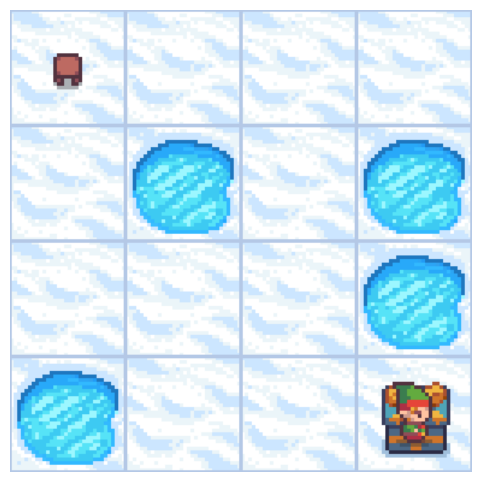

Total Reward: 1.0


In [8]:
# اختبار التعلم بعد اكتمال التدريب
state, info = env.reset()  # إعادة تهيئة البيئة للاختبار بعد التدريب
done = False
total_reward = 0

# إنشاء الشكل لعرض البيئة
fig, ax = plt.subplots(figsize=(6, 6))

# حلقة الاختبار لتقييم أداء الوكيل بعد التدريب
while not done:
     # اختيار أفضل فعل
    action = np.argmax(q_table[state])
    # اتخاذ الفعل واكتساب المكافأة
    next_state, reward, terminated, truncated, info = env.step(action)

    # الحصول على الإطار (الصورة) من البيئة
    frame = env.render()

    # تحديث الرسم البياني بالإطار الجديد
    ax.clear()  # مسح الإطار السابق
    ax.imshow(frame)  # عرض الإطار الحالي
    ax.axis('off')  # إخفاء المحاور لتوفير عرض أفضل

    # مسح الإطار السابق وعرض الشكل الجديد
    clear_output(wait=True)  # مسح الإطار السابق من العرض
    display(fig)  # عرض الشكل الجديد
    plt.pause(5)  # الانتظار لفترة قصيرة لإنشاء تأثير الحركة

    total_reward += reward  # جمع المكافآت خلال الاختبار
    state = next_state  # الانتقال إلى الحالة التالية
    # التحقق مما إذا كانت الحلقة قد انتهت
    if terminated or truncated:
        done = True

# طباعة المكافأة الإجمالية بعد اختبار الوكيل
print(f"Total Reward: {total_reward}")

# إغلاق البيئة بعد الانتهاء من الاختبار
env.close()